In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# ガウス正規分布式
def p(x, mean, sd):
    #ガウス分布の公式
    y = (1 / np.sqrt(2 * np.pi * sd ** 2 ) ) * np.exp(-(x - mean) ** 2 / (2 * sd ** 2))
    return y

# データの中における最大値と最小値を使って正規化する
def minmaxNormalized(x, axis=None):
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    result = (x-min)/(max-min)
    return result

# 標準化
def zscore(x, axis = None):
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore


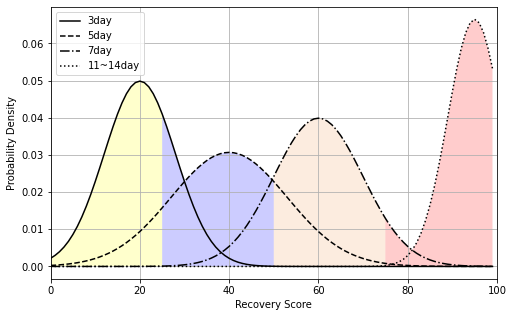

In [79]:
#main
np.random.seed(202103)
sigma = [8.0, 13.0, 10.0, 6.0] #シグマの値
mean = [20, 40, 60, 95] #μの値
labels = ["3day","5day","7day","11~14day"]
x_min, x_max, x_step = 0, 100, 1
color = ["Yellow", "Blue", "sandybrown","Red"]
style = ["solid",  "dashed", "dashdot", "dotted"]
q = [0,25,50,75,100]


# ガウス分布グラフ描画比較
x = np.arange(x_min, x_max, x_step)
plt.figure(figsize=(8,5))    #画像の出力サイズを調整
for i in range(len(mean)):
    # 式でグラフ描画
    globals()["y + str(i)"] = p(x, mean[i], sigma[i]) 
    plt.plot(x, globals()["y + str(i)"], linestyle=style[i], label=labels[i], color = "black")
    
    if i==0:
        plt.fill_between(x, 0, globals()["y + str(i)"],
                        where= (q[i+1]>=x)&(x>=q[i]),
                        facecolor=color[i],
                        alpha=0.2)
    else:
        globals()["y + str(i-1)"] = p(x, mean[i-1], sigma[i-1]) 
        y = np.maximum(globals()["y + str(i-1)"], globals()["y + str(i)"])
        plt.fill_between(x, 0, y,
                where= (q[i+1]>=x)&(x>=q[i]),
                facecolor=color[i],
                alpha=0.2)
plt.xlim([x_min, x_max])
plt.grid()          #グリット線
plt.xlabel('Recovery Score')     #x軸のラベル
plt.ylabel('Probability Density')     #y軸のラベル
plt.legend()
#plt.title('日付ごとの繊維の回復度合いの密度分布', fontname="MS Gothic")
plt.savefig('all_graph_%d.png'%(i), dpi=70)
plt.show()